In [2]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
#from spacytextblob.spacytextblob import SpacyTextBlob
import json
plt.rcParams.update({"font.size": 12})
%matplotlib inline

In [9]:
submissions_json = "WSB_Datasets/submission_data_pushshift_score1_20211020_clean.json"

In [ ]:
from pathlib import Path
# read json
p = Path(r'C:\Users\96ank\Notebooks\WSB-internship\WSB_Datasets\submission_data_pushshift_score1_20211020_clean.json')

with p.open('r', encoding='utf-8') as f:
    data = json.loads(f.read())



In [30]:
list(data[0].keys())

['all_awardings',
 'allow_live_comments',
 'author',
 'author_flair_css_class',
 'author_flair_richtext',
 'author_flair_text',
 'author_flair_type',
 'author_fullname',
 'author_is_blocked',
 'author_patreon_flair',
 'author_premium',
 'awarders',
 'can_mod_post',
 'contest_mode',
 'created_utc',
 'domain',
 'full_link',
 'gildings',
 'id',
 'is_created_from_ads_ui',
 'is_crosspostable',
 'is_meta',
 'is_original_content',
 'is_reddit_media_domain',
 'is_robot_indexable',
 'is_self',
 'is_video',
 'link_flair_background_color',
 'link_flair_css_class',
 'link_flair_richtext',
 'link_flair_template_id',
 'link_flair_text',
 'link_flair_text_color',
 'link_flair_type',
 'locked',
 'media_only',
 'no_follow',
 'num_comments',
 'num_crossposts',
 'over_18',
 'parent_whitelist_status',
 'permalink',
 'pinned',
 'pwls',
 'retrieved_on',
 'score',
 'selftext',
 'send_replies',
 'spoiler',
 'stickied',
 'subreddit',
 'subreddit_id',
 'subreddit_subscribers',
 'subreddit_type',
 'suggested_sor

In [95]:
cols = [
 'author', 
 'created_utc',  
 'id', 
'link_flair_text',
 'num_comments', 
 'score',
  'subreddit_subscribers',   
 'selftext', 
 'title', 'upvote_ratio', 'url'

]


df_data = []

for doc in data:
    if  doc.keys() >= set(cols):
        lst =  [doc['author'], doc['created_utc'],doc['id']
                ,doc[ 'link_flair_text'], 
                doc['num_comments'],doc[ 'score'],
                doc[ 'subreddit_subscribers'],doc['selftext'],doc['title'],
                doc['upvote_ratio'], doc['url']           
                ]
        df_data.append(lst)
        
        

df = pd.DataFrame(data=df_data, columns=cols)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714666 entries, 0 to 714665
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   author                 714666 non-null  object 
 1   created_utc            714666 non-null  int64  
 2   id                     714666 non-null  object 
 3   link_flair_text        714666 non-null  object 
 4   num_comments           714666 non-null  int64  
 5   score                  714666 non-null  int64  
 6   subreddit_subscribers  714666 non-null  int64  
 7   selftext               714666 non-null  object 
 8   title                  714666 non-null  object 
 9   upvote_ratio           714666 non-null  float64
 10  url                    714666 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 60.0+ MB


In [97]:
df.to_csv("data/WSB_submissions.csv", sep=";")

In [98]:
df.head()

,author,created_utc,id,link_flair_text,num_comments,score,subreddit_subscribers,selftext,title,upvote_ratio,url
0,VendiVendiVendi,1634666337,qbh10s,Gain,0,1,10967090,So 13.56 cad for BB. It’s moving and gaining ...,BB,1.0,https://www.reddit.com/r/wallstreetbets/commen...
1,Far_Bass_7284,1634666269,qbh04w,News,1,1,10967087,,Surely it is a coincidence.,1.0,https://www.reddit.com/gallery/qbh04w
2,HistoricalAnimator43,1634666124,qbgyco,YOLO,0,1,10967076,,yolo sava options,1.0,https://i.redd.it/a3mzqbu44gu71.png
3,ZaRaWi,1634666091,qbgxy8,YOLO,0,1,10967076,,meme,1.0,https://i.redd.it/ki810mvz3gu71.jpg
4,CuteInterest1884,1634665953,qbgw9u,DD,0,1,10967075,"BB is on the move higher, not because of the p...",BB,1.0,https://www.reddit.com/r/wallstreetbets/commen...


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714666 entries, 0 to 714665
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   author           714666 non-null  object 
 1   created_utc      714666 non-null  int64  
 2   id               714666 non-null  object 
 3   num_comments     714666 non-null  int64  
 4   score            714666 non-null  int64  
 5   permalink        714666 non-null  object 
 6   selftext         714666 non-null  object 
 7   title            714666 non-null  object 
 8   upvote_ratio     714666 non-null  float64
 9   url              714666 non-null  object 
 10  link_flair_text  714666 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 60.0+ MB


In [99]:
df['created_utc'] = pd.to_datetime(df['created_utc'], unit='s')

In [107]:
#set created_utc as index
#df.set_index('created_utc')

df.index = pd.DatetimeIndex(df.created_utc)


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 714666 entries, 2021-10-19 17:58:57 to 2020-04-29 18:27:30
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   author                 714666 non-null  object        
 1   created_utc            714666 non-null  datetime64[ns]
 2   id                     714666 non-null  object        
 3   link_flair_text        714666 non-null  object        
 4   num_comments           714666 non-null  int64         
 5   score                  714666 non-null  int64         
 6   subreddit_subscribers  714666 non-null  int64         
 7   selftext               714666 non-null  object        
 8   title                  714666 non-null  object        
 9   upvote_ratio           714666 non-null  float64       
 10  url                    714666 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 65

# 3. Exploratory Data Analysis

## 3.1. Number of submissions

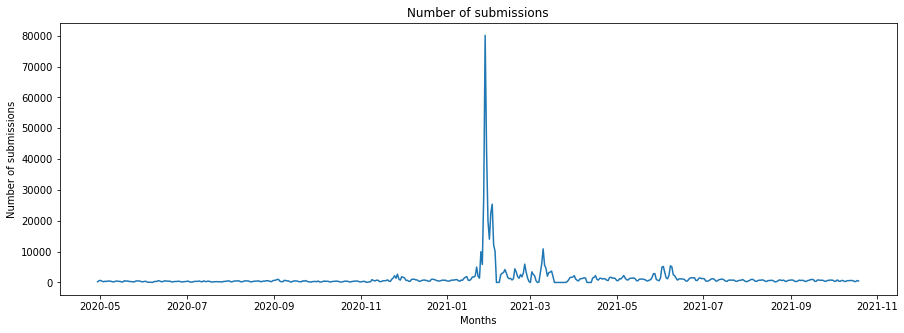

In [109]:
df_submissions = df.groupby(pd.Grouper(freq="D"))["id"].count()
 

plt.figure(figsize=(15,5))
plt.plot(df_submissions)
plt.xlabel("Months")
plt.ylabel("Number of submissions")
plt.title("Number of submissions")
plt.show()

## 3.2. Number of subscribers

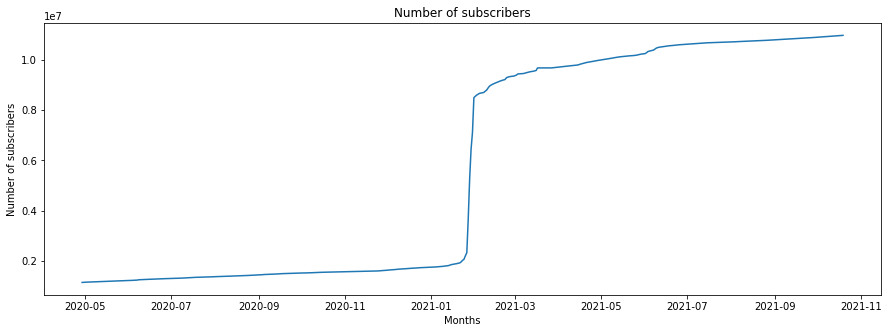

In [110]:
df_subscribers = df.groupby(pd.Grouper(freq="D"))["subreddit_subscribers"].nth(-1)
# print(df_subscribers)

plt.figure(figsize=(15,5))
plt.plot(df_subscribers)
plt.xlabel("Months")
plt.ylabel("Number of subscribers")
plt.title("Number of subscribers")
plt.show()

## 3.3. Number of submissions by flair

In [111]:
df_flairs = df.groupby("link_flair_text")["link_flair_text"].count().sort_values(ascending=False)
print(f"{len(df_flairs)} flair categories:\n{df_flairs.index.values}\n")
print(f"Top 15 flair count:\n{df_flairs.head(15)}")

37 flair categories:
['Discussion' 'Meme' 'YOLO' 'News' 'Gain' 'Loss' 'DD' 'Shitpost' 'Chart'
 'Technical Analysis' 'Stocks' 'Options' 'Satire' 'Storytime'
 'Fundamentals' 'Technicals' 'Daily Discussion' 'Futures' 'Donation'
 'Earnings Thread' 'Forex' 'Weekend Discussion' 'WSBbooks' 'Mods' 'Gods'
 "IT'S ACTUALLY GOOD" 'GME Thread' 'Literally 10 minutes long'
 'Megathread' 'Welcome' 'Mods - Regarding MrBeast Post'
 'Mods - Rule Reminder' 'Official' 'Tendies'
 'Thank you, silent participants!' "Tuesday 2-Feb. I'm retarded"
 'Announcement']

Top 15 flair count:
link_flair_text
Discussion            174636
Meme                  159926
YOLO                  107421
News                   74665
Gain                   62518
Loss                   36760
DD                     33597
Shitpost               20632
Chart                  11074
Technical Analysis      9684
Stocks                  6052
Options                 5957
Satire                  3010
Storytime               2319
Fundamentals 

<AxesSubplot:xlabel='link_flair_text'>

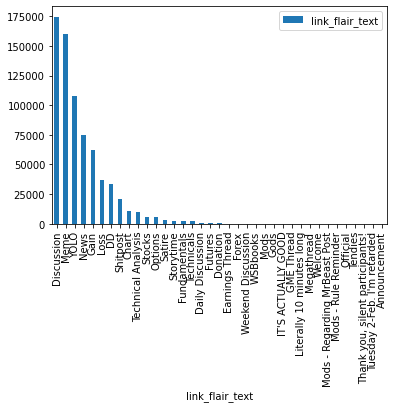

In [137]:
df_flairs.plot.bar()

## 3.4. Top authors by submissions

In [113]:
df_authors = df.groupby("author")["author"].count().sort_values(ascending=False)
print(f"Top 15 authors:\n{df_authors.head(15)}")

# @todo Fetch top authors data and do some data analysis

Top 15 authors:
author
OPINION_IS_UNPOPULAR    371
AutoModerator           366
RealPennyMuncher        223
patrickbateman02        220
pdwp90                  194
btoned                  184
keenfeed                182
indonesian_activist     163
cuki321                 162
dhiral1994              152
Janto_2021              150
DeadLightsOut           147
DrioMarqui              146
[deleted]               139
The_wokeHindi           133
Name: author, dtype: int64


In [140]:
from spacytextblob.spacytextblob import SpacyTextBlob

# 2. Find Sentiment

## 2.1. Intialize pipline

<!-- ![nlp_pipeline](https://spacy.io/pipeline-fde48da9b43661abcdf62ab70a546d71.svg) -->

In [141]:
# @todo Handle stop words
# @todo Calculate weighted mean for sentiments using score + upvote_ratio 

# nlp = spacy.load("en_core_web_lg")
nlp = spacy.blank("en")
if "spacytextblob" not in nlp.pipe_names:
    nlp.add_pipe("spacytextblob")
    nlp.rename_pipe("spacytextblob", "sentiment")
print(nlp.pipe_names)

['sentiment']


## 2.2. Find sentiment

In [142]:
df["title_polarity"] = 0.0
df["title_subjectivity"] = 0.0
df["body_polarity"] = 0.0
df["body_subjectivity"] = 0.0
df["polarity"] = 0.0

def get_sentiment(title, body):
    nlp_title = nlp(title)
    nlp_body = nlp(body)
    return pd.Series([nlp_title._.polarity, nlp_title._.subjectivity,
                      nlp_body._.polarity, nlp_body._.subjectivity])

df[["title_polarity", "title_subjectivity", "body_polarity", "body_subjectivity"]] = df.apply(lambda row: get_sentiment(row["title"], row["selftext"]), axis=1)
df["polarity"] = (df["title_polarity"] + df["body_polarity"])
df.head()

,author,created_utc,id,link_flair_text,num_comments,score,subreddit_subscribers,selftext,title,upvote_ratio,url,title_polarity,title_subjectivity,body_polarity,body_subjectivity,polarity
created_utc,,,,,,,,,,,,,,,,
2021-10-19 17:58:57,VendiVendiVendi,2021-10-19 17:58:57,qbh10s,Gain,0,1,10967090,So 13.56 cad for BB. It’s moving and gaining ...,BB,1.0,https://www.reddit.com/r/wallstreetbets/commen...,0.0,0.000000,-0.470378,0.516667,-0.470378
2021-10-19 17:57:49,Far_Bass_7284,2021-10-19 17:57:49,qbh04w,News,1,1,10967087,,Surely it is a coincidence.,1.0,https://www.reddit.com/gallery/qbh04w,0.5,0.888889,0.000000,0.000000,0.500000
2021-10-19 17:55:24,HistoricalAnimator43,2021-10-19 17:55:24,qbgyco,YOLO,0,1,10967076,,yolo sava options,1.0,https://i.redd.it/a3mzqbu44gu71.png,0.0,0.000000,0.000000,0.000000,0.000000
2021-10-19 17:54:51,ZaRaWi,2021-10-19 17:54:51,qbgxy8,YOLO,0,1,10967076,,meme,1.0,https://i.redd.it/ki810mvz3gu71.jpg,0.0,0.000000,0.000000,0.000000,0.000000
2021-10-19 17:52:33,CuteInterest1884,2021-10-19 17:52:33,qbgw9u,DD,0,1,10967075,"BB is on the move higher, not because of the p...",BB,1.0,https://www.reddit.com/r/wallstreetbets/commen...,0.0,0.000000,0.168254,0.506349,0.168254


In [145]:
df.to_csv("data/WSB_submissions_features.csv", sep=";")

## 2.3. Group by day

In [143]:
df_polarity = df.groupby(pd.Grouper(freq="D"))[["polarity"]].mean()
df_polarity = df_polarity.fillna(0)
display(df_polarity.head())

,polarity
created_utc,
2020-04-29,0.071991
2020-04-30,0.034093
2020-05-01,0.058532
2020-05-02,0.061776
2020-05-03,0.029154


## To Do - word/emoji counts, choice of words, n-grams/phrases, topic modeling,